https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need an area chart comparing sales of multifamily to single family.

Parse dates and set index from pd.read_csv() in jsoncleaner

Want to show autocorrelation between 

Need to find the neighborhoods which experience the largest increase in median price per square foot.

Need to add 2014 data, but it's different from other data.

Annual inflation data:

https://data.bls.gov/timeseries/CUUR0000SA0L1E?output_view=pct_12mths

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [2]:
df1= pd.read_csv('nashville_20190903173657.csv', parse_dates = ['Most Recent Sale Date', 'Sale Date'],dtype={'Zone': str, 'Neighborhood': str})

/home/drew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
START, END = '2015-01-01', '2019-06'
#df1=df1[df1['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df1['PPS']=df1['Sale Price']/df1['Square Footage Improved']
df1['PPS']=df1['PPS'].replace(np.inf, np.nan)
meanpps=df1.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df1.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)
df=df[df.PPS <= 2000]
df['Assessment Ratio'] = df['Assessment Improvement Improved'] / (df['Assessment Total Improved'])
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

In [4]:
#Creating some useful time variables
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
monthlypps = df.PPS.resample('M').mean()
yearlypps=df.PPS.resample('Y').mean()

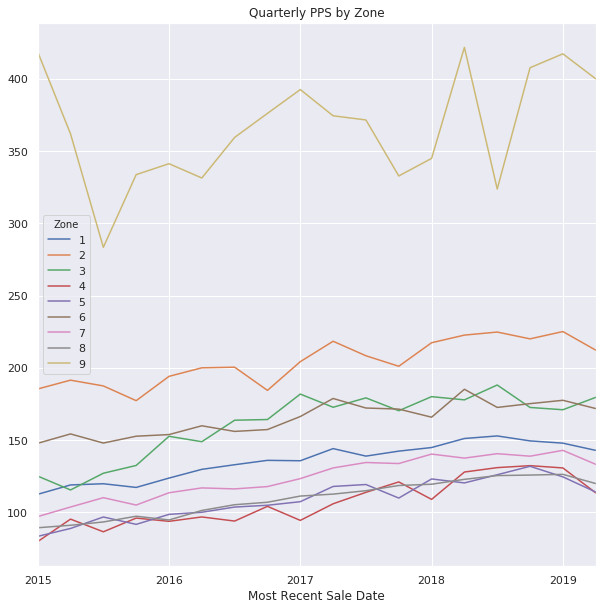

In [6]:
table1 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS').plot(figsize=(10,10), title=('Quarterly PPS by Zone'))
#Clearly Zone 9, the downtown core, is the priciest. It's also the most volatile.
#Zone 2 is the second-highest. We should analyze that because we might fight unique characteristics
#Notably, almost all of the price increase results from these 2 zones.

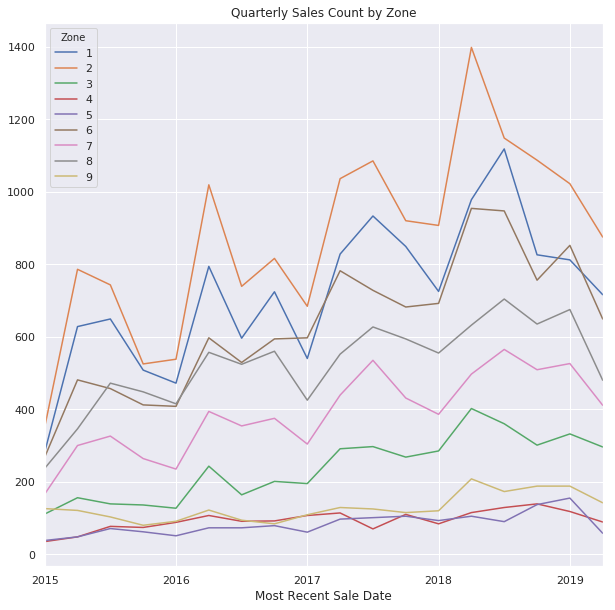

In [8]:
#Want a chart of sale counts by Zone
#Zone 2 shows the most activity.
table2 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').count().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS').plot(figsize=(10,10), title = 'Quarterly Sales Count by Zone')


#There clearly needs to be some element of seasonality in our model, but I have no experience with that.

Text(0.5, 1.0, 'Sale Price over Time')

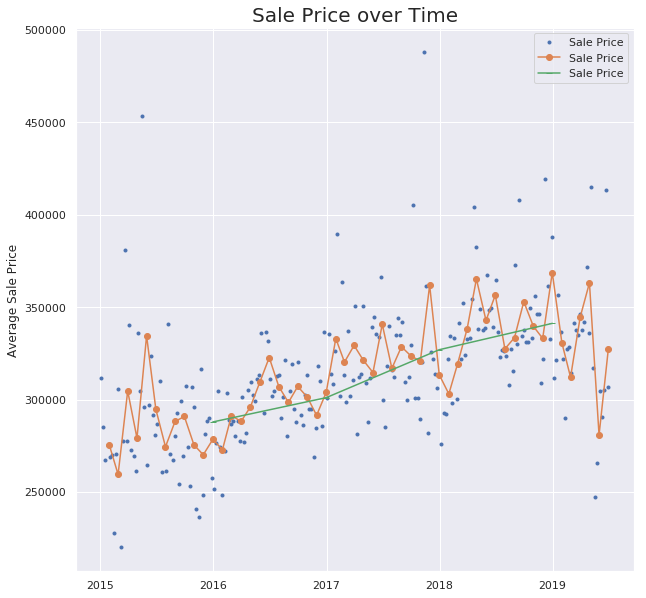

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[START:END],marker='.',linestyle='None')
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
plt.title('Sale Price over Time', fontsize=20)
#Notice the uptick during summer

In [ ]:
#Want a stacked/area graph of sales by Zone and by Housing Type
#sns.lineplot(x=month, y = monthlypps, hue = 'Zone', data = df)

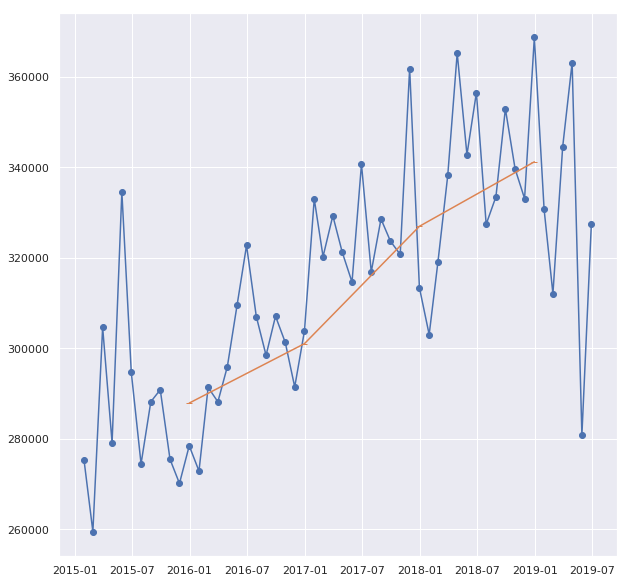

In [11]:
#Plotting PPS through time
ax.set_ylabel('Average PPS 2014-2019');
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')

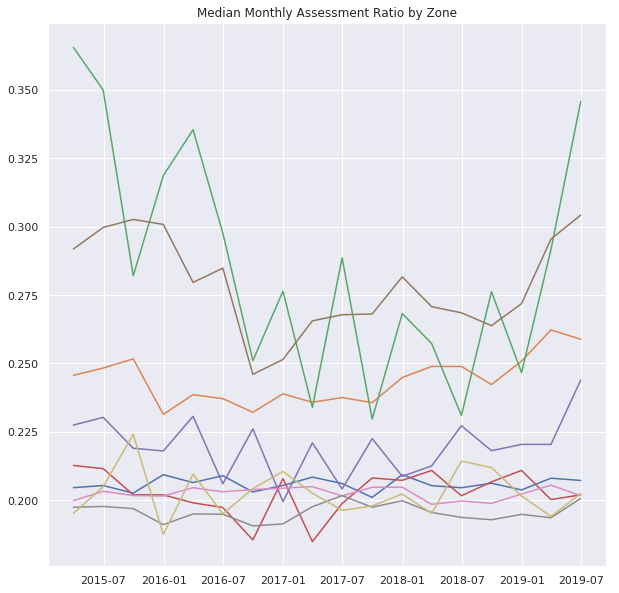

In [14]:
table = df.loc[START:END].groupby('Zone')['Assessment Ratio']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'Assessment Ratio')
plt.figure(figsize=(10,10))
plt.title('Median Monthly Assessment Ratio by Zone')
plt.plot(table)
#No real change in Assessment Ratio.

In [19]:
#.resample('M').mean()
df.groupby(['Sale Date', 'Zone'])['PPS']\
.agg('mean')\
.to_frame()\
.reset_index()\
.pivot_table(index = 'Sale Date', columns= 'Zone', values= 'PPS').head(20)

Zone,1,2,3,4,5,6,7,8,9
Sale Date,,,,,,,,,
2015-01-02,115.506079,158.380160,102.633991,33.500000,82.268579,102.697001,89.152648,86.606463,431.672633
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.829689,NaN
2015-01-05,111.877653,153.296589,112.512249,NaN,95.681760,111.688912,96.676236,70.554297,347.161886
2015-01-06,90.190589,190.163934,69.908958,NaN,NaN,53.025727,90.966700,77.937575,484.673315
2015-01-07,116.640282,293.801620,79.873685,54.718150,NaN,106.296067,97.640179,96.592394,281.007752
2015-01-08,101.040047,119.983810,120.738636,NaN,NaN,106.544943,94.750088,36.574731,545.862346
2015-01-09,110.029554,165.624536,75.156241,NaN,73.803664,138.277903,87.539943,85.325329,411.181052
2015-01-12,86.684128,142.256914,68.327578,NaN,NaN,131.423375,96.811292,79.501916,480.775430
2015-01-13,109.529040,226.375511,NaN,42.303938,100.126743,141.309284,NaN,77.382178,214.518519


In [20]:
dfz9= df[df.Zone==9]

/home/drew/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


RuntimeError: Invalid input data for tsplot.

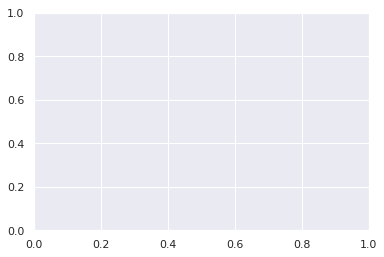

In [21]:
sns.tsplot(dfz9['Assessment Ratio'].loc[START:END].resample('M').mean(), interpolate=True)

In [ ]:
# #Amount of sales by month.
# g = sns.factorplot(month, data=df.loc[START:END], aspect=2, kind="count")

In [ ]:
# g = sns.factorplot(year, data=df.loc[START:END], aspect=2, kind="count")

                             ARIMA Model Results                              
Dep. Variable:                  D.PPS   No. Observations:                   53
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -202.382
Method:                       css-mle   S.D. of innovations             10.925
Date:                Thu, 05 Sep 2019   AIC                            418.765
Time:                        13:44:56   BIC                            432.557
Sample:                    02-28-2015   HQIC                           424.069
                         - 06-30-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5534      0.474      1.168      0.249      -0.375       1.482
ar.L1.D.PPS    -0.8203      0.136     -6.028      0.000      -1.087      -0.554
ar.L2.D.PPS    -0.5952      0.181     -3.281    

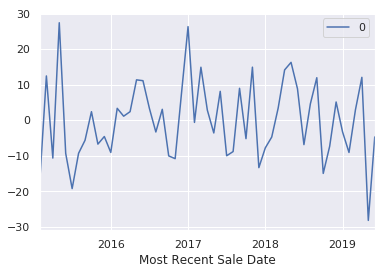

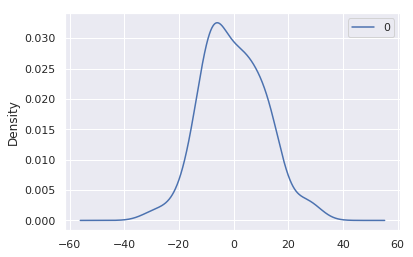

               0
count  53.000000
mean   -0.064725
std    11.195715
min   -28.237178
25%    -8.851752
50%    -0.642022
75%     8.110029
max    27.423726


In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['PPS'].loc[START:END].resample('M').mean().dropna(), order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/home/drew/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/drew/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.PPS   No. Observations:                  484
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -2260.715
Method:                       css-mle   S.D. of innovations             25.627
Date:                Thu, 05 Sep 2019   AIC                           4543.429
Time:                        14:24:56   BIC                           4589.432
Sample:                             2   HQIC                          4561.506
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1973      0.123      1.610      0.108      -0.043       0.437
Assessment Ratio    -0.8344      0.529     -1.578      0.115      -1.871       0.202
ar.L1.D2.PPS        -0.6477 

<Figure size 648x648 with 0 Axes>

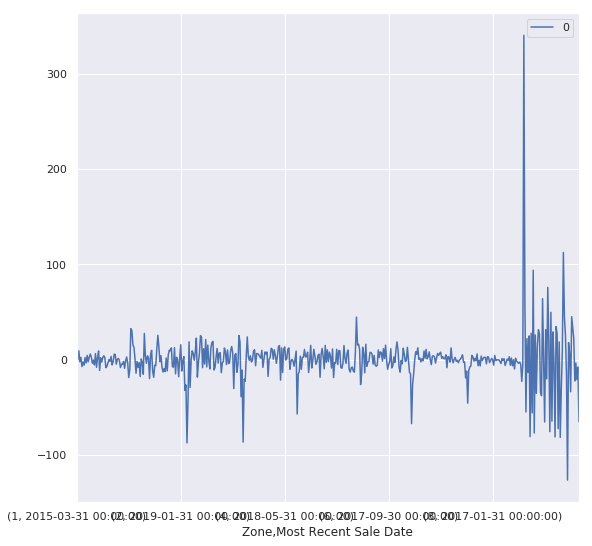

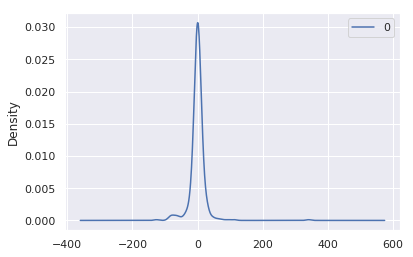

                0
count  484.000000
mean    -0.181442
std     25.696054
min   -126.547968
25%     -6.162480
50%      0.121790
75%      7.273339
max    340.872725


In [38]:
#Testing impact of Assessment Ratio on price per square foot
df2=df[['Assessment Ratio', 'Zone', 'PPS']].dropna()
ratio = df2.loc[START:END].groupby('Zone')['Assessment Ratio'].resample('M').median()
pps = df2.loc[START:END].groupby('Zone')['PPS']\
.resample('M').median()

model = ARIMA(endog=pps, exog=ratio, order = (5,2,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(9,9))
residuals.plot(figsize=(9,9))
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#